**Aim:** 
To analyze the sentiment and factors/reason for reviews of books on Kindle

**Main contents:**
- Data information
- Data exploration: Text mining with NLTK, Vader sentiment scoring, analyze the relation between sentiment vs helpful column and show sentiment by years.
- Terms and frequencies in book reviews: use bigram, ngrame for analysis, generate cloud of word

In [279]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import nltk

**DATA INFORMATION**

In [168]:
#Read the dataset
df_review = pd.read_csv("Kindle Review.csv")
df_review.shape

(12000, 11)

In [169]:
df_review.columns

Index(['No.', 'Unnamed: 0', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [170]:
df_review = df_review.drop(columns=['Unnamed: 0', 'No.', 'asin', 'reviewerName', 'unixReviewTime'])

In [171]:
df_review = df_review.rename(columns={"reviewerID": "ID","reviewText" : "review_text", "reviewTime" : "review_time"})

Time Column cleaning

In [172]:
time = df_review['review_time'].str.split(",", n=1, expand=True)

#make separate date column from new data frame
df_review["date"] = time[0]
df_review["year"] = time[1]
df_review = df_review.drop(['review_time'], axis = 1)
df_review.head()

,helpful,rating,review_text,ID,summary,date,year
0,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Entertaining But Average,09 2,2010
1,"[1, 1]",5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Terrific menage scenes!,10 8,2013
2,"[0, 0]",3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Snapdragon Alley,04 11,2014
3,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,very light murder cozy,07 5,2014
4,"[0, 1]",4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Book,12 31,2012


**DATA EXPLORATION**

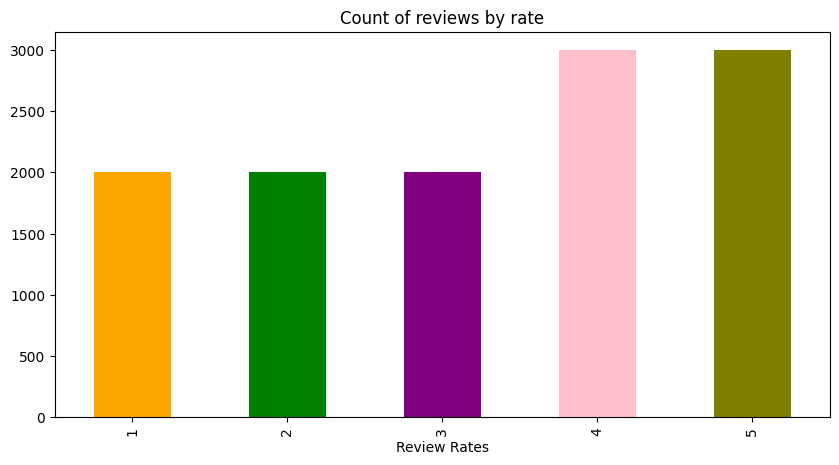

In [173]:
ax = df_review['rating'].value_counts().sort_index()\
                        .plot(kind = 'bar', 
                              title = 'Count of reviews by rate', 
                              figsize = (10,5), color=['orange', 'green', 'purple', 'pink', 'olive'])
ax.set_xlabel('Review Rates')
plt.show()

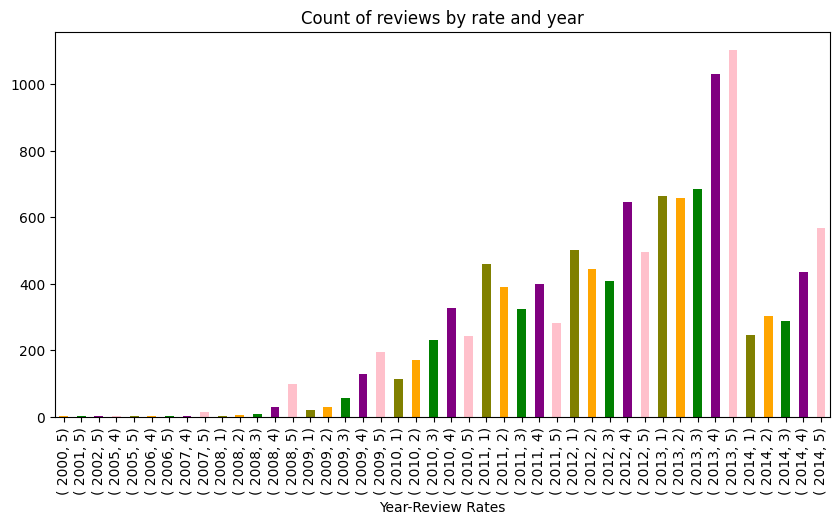

In [192]:
ax = df_review.groupby(by='year')['rating'].value_counts().sort_index()\
.plot(kind = 'bar',
title = 'Count of reviews by rate and year',
figsize = (10,5), color=['orange', 'green', 'purple', 'pink', 'olive'])
ax.set_xlabel('Year-Review Rates')
plt.show()

**Text mining with NLTK**

In [ ]:
example = df_review['review_text'][20]
example

'This was my first Anya Bast book and I really liked it. I have looked at some of her other reads but her books seems a little too far fetched for me but to each his own. What makes this book so different from other menage stories is that the author took the time to really develop her characters. The men got to know their woman. They did not claim her and wisk her off and screw like bunnies 24/7. They took the time to woo her, they loved her, respected her, and they honored her. I also loved the fact that it was quite ways into the book before they actually had sex. This was a great read and one I would highly recommend! I would have loved more action and intrigue but for the most part I loved it. I hope this books becomes a series. Great job Ms. Bast.'

In [ ]:
nltk.download("punkt")
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to C:\Users\Tai
[nltk_data]     Nguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This', 'was', 'my', 'first', 'Anya', 'Bast', 'book', 'and', 'I', 'really']

In [ ]:
nltk.download("averaged_perceptron_tagger")
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tai Nguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('was', 'VBD'),
 ('my', 'PRP$'),
 ('first', 'JJ'),
 ('Anya', 'NNP'),
 ('Bast', 'NNP'),
 ('book', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('really', 'RB')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Tai
[nltk_data]     Nguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Tai
[nltk_data]     Nguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  This/DT
  was/VBD
  my/PRP$
  first/JJ
  Anya/NNP
  Bast/NNP
  book/NN
  and/CC
  I/PRP
  really/RB
  liked/VBD
  it/PRP
  ./.
  I/PRP
  have/VBP
  looked/VBN
  at/IN
  some/DT
  of/IN
  her/PRP$
  other/JJ
  reads/NNS
  but/CC
  her/PRP$
  books/NNS
  seems/VBZ
  a/DT
  little/JJ
  too/RB
  far/RB
  fetched/VBN
  for/IN
  me/PRP
  but/CC
  to/TO
  each/DT
  his/PRP$
  own/JJ
  ./.
  What/WP
  makes/VBZ
  this/DT
  book/NN
  so/RB
  different/JJ
  from/IN
  other/JJ
  menage/NN
  stories/NNS
  is/VBZ
  that/IN
  the/DT
  author/NN
  took/VBD
  the/DT
  time/NN
  to/TO
  really/RB
  develop/VB
  her/PRP$
  characters/NNS
  ./.
  The/DT
  men/NNS
  got/VBD
  to/TO
  know/VB
  their/PRP$
  woman/NN
  ./.
  They/PRP
  did/VBD
  not/RB
  claim/VB
  her/PRP$
  and/CC
  wisk/VB
  her/PRP$
  off/NN
  and/CC
  screw/NN
  like/IN
  bunnies/NNS
  24/7/CD
  ./.
  They/PRP
  took/VBD
  the/DT
  time/NN
  to/TO
  woo/VB
  her/PRP
  ,/,
  they/PRP
  loved/VBD
  her/PRP
  ,/,
  respected/VBD
  he

Vader sentiment scoring
- Use NLTK sentiment intensity analyzer to get the neg, neu, pos scores of the text
- Use bag of word approach: remove stop words and score and combine score of each word

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Tai
[nltk_data]     Nguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores("This is the worst day of my life ever!")

{'neg': 0.354, 'neu': 0.646, 'pos': 0.0, 'compound': -0.6588}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.008, 'neu': 0.678, 'pos': 0.314, 'compound': 0.9964}

In [ ]:
#run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df_review.iterrows(), total = len(df_review)):
    text = row['review_text']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text) 

  0%|          | 0/12000 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'ID'})
vaders = vaders.merge(df_review, how='left')

In [ ]:
#sentiment score and metadata
vaders.head()

,ID,neg,neu,pos,compound,helpful,rating,review_text,summary,date,year
0,A3HHXRELK8BHQG,0.069,0.778,0.153,0.9896,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average,09 2,2010
1,A3HHXRELK8BHQG,0.069,0.778,0.153,0.9896,"[16, 22]",1,"""Dani Standifer arrives home at her West Texas...",Just not good.,12 17,2009
2,A2RGNZ0TRF578I,0.000,0.528,0.472,0.9865,"[1, 1]",5,Great short read. I didn't want to put it dow...,Terrific menage scenes!,10 8,2013
3,A2RGNZ0TRF578I,0.000,0.528,0.472,0.9865,"[0, 0]",5,"This book was not only steamy, but it made me ...",Steamy and funny at the same time!,10 8,2013
4,A3S0H2HV6U1I7F,0.000,0.908,0.092,0.7772,"[0, 0]",3,I'll start by saying this is the first of four...,Snapdragon Alley,04 11,2014


Plot vader results

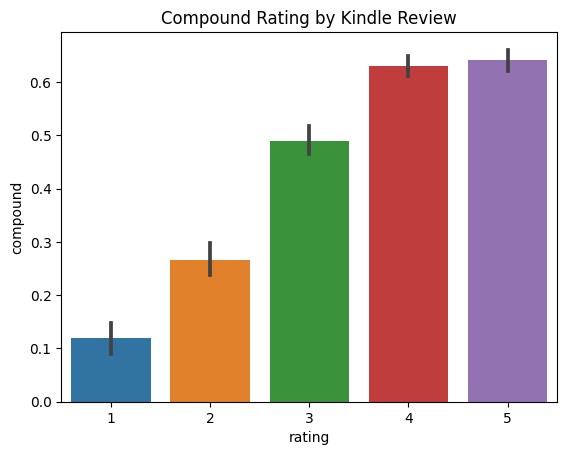

In [ ]:
ax = sns.barplot(data = vaders, x='rating', y='compound')
ax.set_title('Compound Rating by Kindle Review')
plt.show()

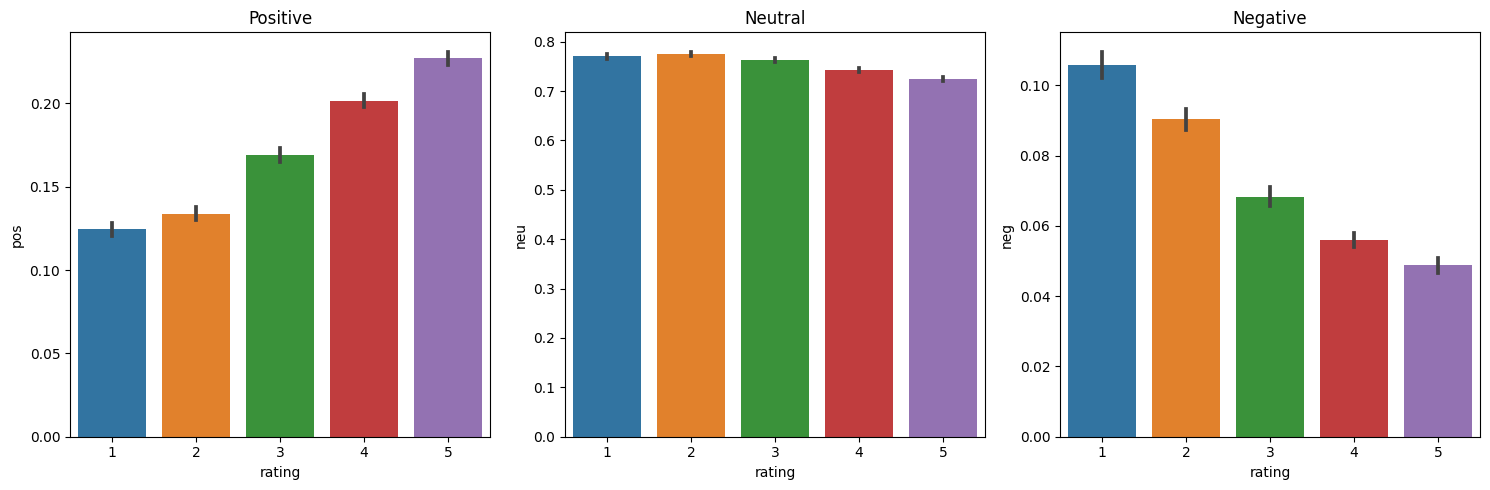

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

**Sentiment vs helpful**

In [201]:
df_review['rating'].value_counts()

def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['rating'] == 3.0:
        val = 'Neutral'
    elif row['rating'] == 1.0 or row['rating'] == 2.0:
        val = 'Negative'
    elif row['rating'] == 4.0 or row['rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

df_review['sentiment'] = df_review.apply(f, axis=1)
df_review.head()

,helpful,rating,review_text,ID,summary,date,year,sentiment
0,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Entertaining But Average,09 2,2010,Neutral
1,"[1, 1]",5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Terrific menage scenes!,10 8,2013,Positive
2,"[0, 0]",3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Snapdragon Alley,04 11,2014,Neutral
3,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,very light murder cozy,07 5,2014,Neutral
4,"[0, 1]",4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Book,12 31,2012,Positive


In [206]:
# Splitting the dataset based on comma and square bracket 
new1 = df_review["helpful"].str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)

#Resetting the index
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)


# I found few spaces in new3, so it is better to strip all the values to find the rate
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2) 

#Attaching the results to a new column of the main dataframe
df_review['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
df_review=df_review.drop(['helpful'], axis=1)
df_review.head()

,rating,review_text,ID,summary,date,year,sentiment,helpful_rate
0,3,"Jace Rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Entertaining But Average,09 2,2010,Neutral,0.80
1,5,Great short read. I didn't want to put it dow...,A2RGNZ0TRF578I,Terrific menage scenes!,10 8,2013,Positive,1.00
2,3,I'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Snapdragon Alley,04 11,2014,Neutral,0.00
3,3,Aggie is Angela Lansbury who carries pocketboo...,AC4OQW3GZ919J,very light murder cozy,07 5,2014,Neutral,0.33
4,4,I did not expect this type of book to be in li...,A3C9V987IQHOQD,Book,12 31,2012,Positive,0.00


In [208]:
pd.DataFrame(df_review.groupby('sentiment')['helpful_rate'].mean())

,helpful_rate
sentiment,
Negative,0.395795
Neutral,0.324415
Positive,0.338565


The mean of helpful rate for negative is higher than neutral and positive reviews. It means that value might have been influenced by the 0 values in helpful rates.

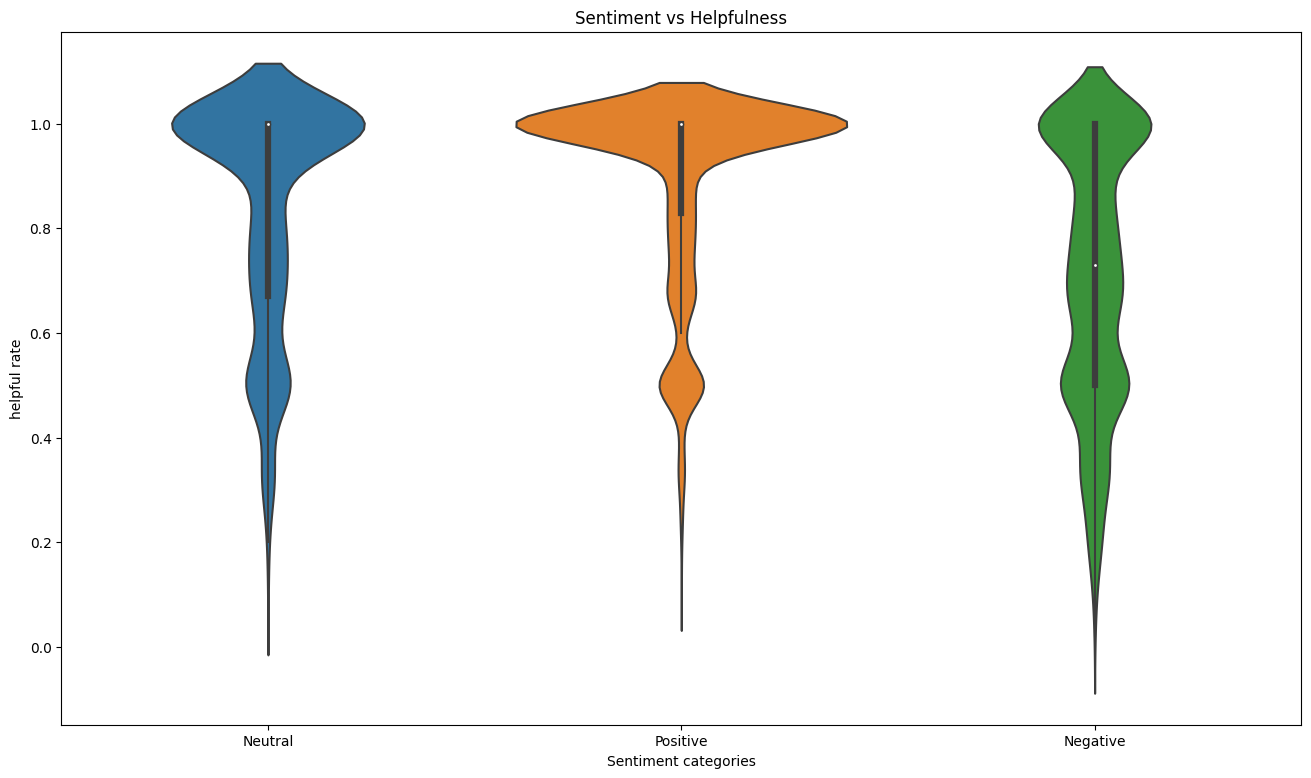

In [209]:
plt.figure(figsize=(16,9))

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(df_review, columns = ['sentiment', 'helpful_rate'])
senti_help = senti_help[senti_help['helpful_rate'] != 0.00] 

#Plotting phase
sns.violinplot( x=senti_help["sentiment"], y=senti_help["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('helpful rate')
plt.show()


The positive review has higher helpful rate than neutral and negative. The negative review has less helpful rate than neutral and positive.

**Sentiment by years**

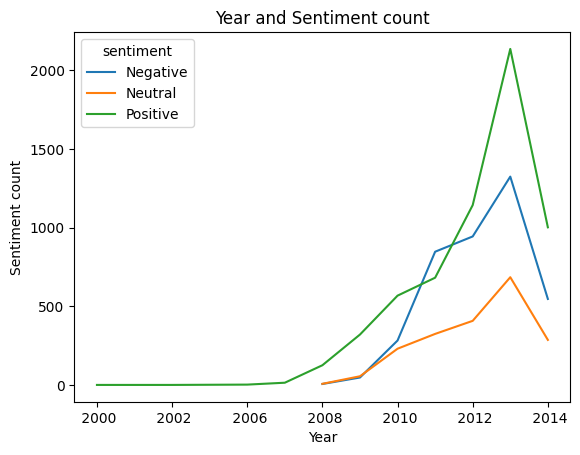

In [210]:
df_review.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

Positive reviews have incresed significantly from 2010 to 2013 and drop rapidly from 2013 to 2014. This trends were applied to neutral and positive review. Compare to positive review, neutral and negative review have lower rate.

**TERMS AND FREQUENCIES IN BOOK REVIEWS**

In [268]:
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

review_pos = df_review[df_review["sentiment"]=='Positive'].dropna()
review_neu = df_review[df_review["sentiment"]=='Neutral'].dropna()
review_neg = df_review[df_review["sentiment"]=='Negative'].dropna()

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

[nltk_data] Downloading package stopwords to C:\Users\Tai
[nltk_data]     Nguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


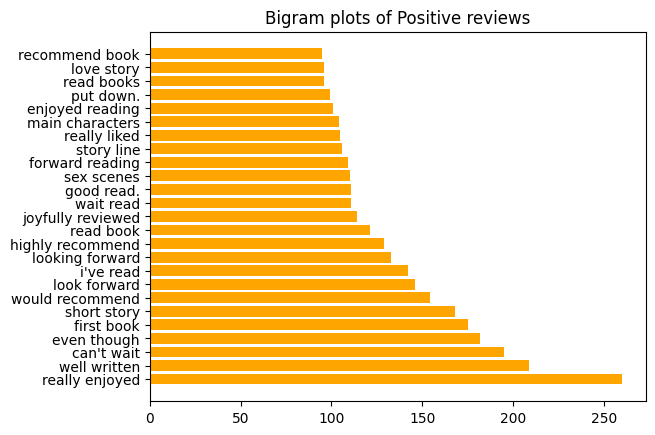

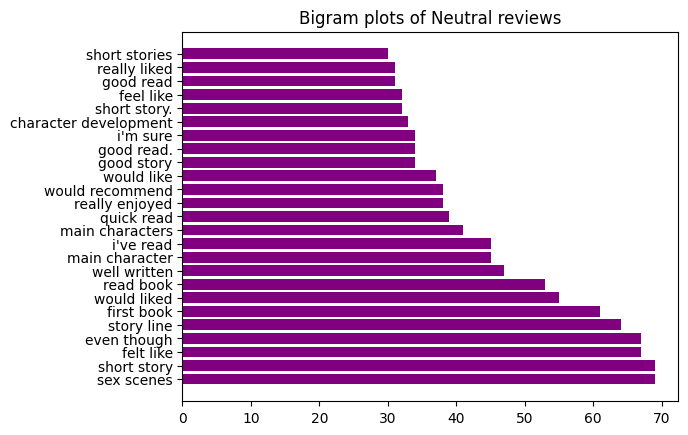

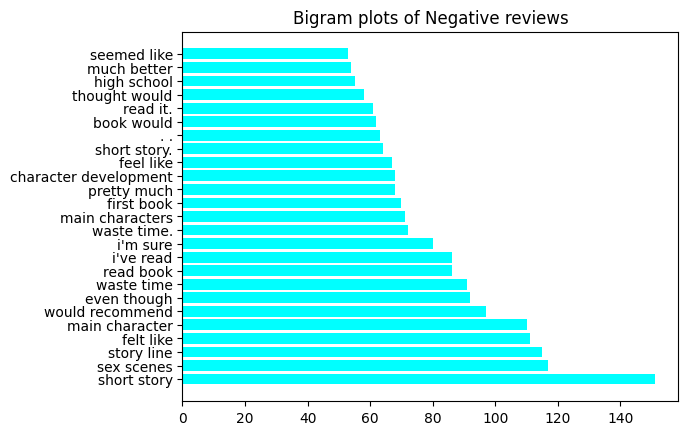

In [273]:
import matplotlib.pyplot as plt
import numpy as np

def horizontal_bar_chart(df, color):
    words = df["word"]
    wordcounts = df["wordcount"]
    fig, ax = plt.subplots()
    ax.barh(words, wordcounts, color=color)
    return fig, ax

# Get the bar chart from positive reviews
freq_dict = defaultdict(int)
for sent in review_pos["review_text"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fig0, ax0 = horizontal_bar_chart(fd_sorted.head(25), 'orange')
plt.title("Bigram plots of Positive reviews")

# Get the bar chart from neutral reviews
freq_dict = defaultdict(int)
for sent in review_neu["review_text"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fig1, ax1 = horizontal_bar_chart(fd_sorted.head(25), 'purple')
plt.title("Bigram plots of Neutral reviews")

# Get the bar chart from negative reviews
freq_dict = defaultdict(int)
for sent in review_neg["review_text"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fig2, ax2 = horizontal_bar_chart(fd_sorted.head(25), 'cyan')
plt.title("Bigram plots of Negative reviews")

plt.show()



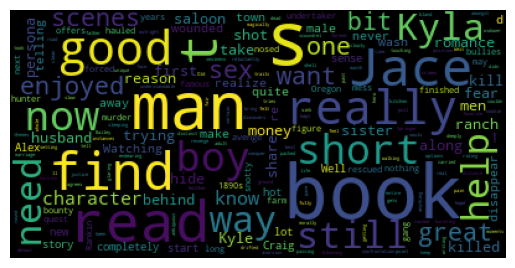

In [278]:
#Generate word cloud of review column
def generate_wordcloud(df, column, max_font_size=60, collocations=False):
    text = df[column].values
    return WordCloud(max_font_size=max_font_size, collocations=collocations).generate(str(text))
wordcloud = generate_wordcloud(df_review, "review_text")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

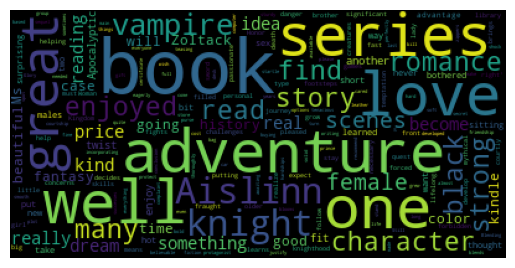

In [274]:
#Generate word cloud of positive reviews
def generate_wordcloud(df, column, max_font_size=60, collocations=False):
    text = df[column].values
    return WordCloud(max_font_size=max_font_size, collocations=collocations).generate(str(text))
wordcloud = generate_wordcloud(review_pos, "review_text")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

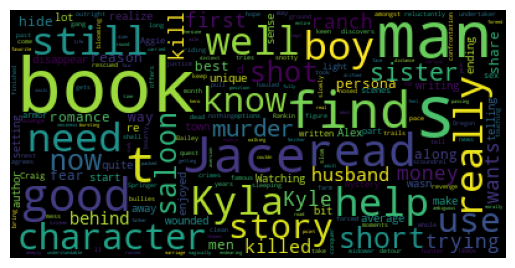

In [275]:
#Generate word cloud of neutral reviews
def generate_wordcloud(df, column, max_font_size=60, collocations=False):
    text = df[column].values
    return WordCloud(max_font_size=max_font_size, collocations=collocations).generate(str(text))
wordcloud = generate_wordcloud(review_neu, "review_text")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

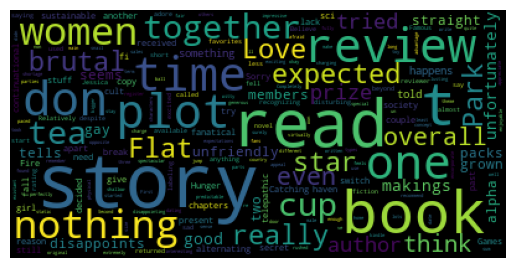

In [276]:
#Generate word cloud of negative reviews
def generate_wordcloud(df, column, max_font_size=60, collocations=False):
    text = df[column].values
    return WordCloud(max_font_size=max_font_size, collocations=collocations).generate(str(text))
wordcloud = generate_wordcloud(review_neg, "review_text")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**CONCLUSION**

We 'vs done text mining by using sentiment analysis and ngram to find positive, negative, neutral languages and terms/frequencies of these languages. The outcome shows that:
- The positive review rate are higher than negative and neutral reviews. 
- People give positive review finds the book more helpful than people give negative and neutral reviews.
- Positive reviews have incresed significantly from 2010 to 2013 and drop rapidly from 2013 to 2014. This trends were applied to neutral and positive review. Compare to positive review, neutral and negative review have lower rate.

Terms & Frequencies:
- Terms that have highest frequency in reviews and their meaning impact on the evaluation are: good, sex, enjoyed, scenes, read, great, skilled, fear, romance, skill, disappear, money, sister, character,etc. 
- Positive reviews: 
  - Book is well written
  - Their first book
  - Short story
  - Will recommend book
  - Love the story
  - Can't put the book down while reading
  - Love main characters
  - Really like the story line
  - Love the sex scenes in the book
- Neutral reviews:
  - Like the sex scenes
  - Short story
  - Story line
  - First book
  - Main character
  - Quick read
- Negative reviews:
  - Short story
  - Sex scenes
  - Story line
  - Main character
  - Waste time

The terms and its frequencies in positive, negative and netral reviews seem similar. It shows that some book develop their character, story line well while other book make it worse. Terms and its frequencies show that reviewers gave review based on the genres, story and character. Many of reviewed books are thriller and romance based on the expression of reviewers.